## Definição do Problema

Temos uma loja de produtos x que bonifica o seu vendedor com uma comissão em reais de acordo com o número de produtos vendidos. Queremos saber qual a relação que existe entre a quantidade de produtos vendidos e o valor em reais da comissão recebida.

### Importando as bibliotecas que serão utilizadas e o banco de dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
vendas = pd.read_excel('comissao.xlsx')

## Análise Inicial

Analisando os dados, tipo de variáveis, quantidade de valores nulos...

In [3]:
vendas.head(10)

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900
5,6,958
6,7,1022
7,8,1092
8,9,1168
9,10,1250


In [4]:
vendas.tail()

,quantidade,comissao
45,46,8198
46,47,8502
47,48,8812
48,49,9128
49,50,9450


In [21]:
print('Comissão mínima:',vendas['comissao'].min())
print('Comissão máxima:',vendas['comissao'].max())

Comissão mínima: 728.0
Comissão máxima: 9450.0


Temos que a quantidade máxima de produtos que pode gerar comissão são 50 e o preço máximo é de 9450 reais.

In [5]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   quantidade  50 non-null     int64
 1   comissao    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [6]:
vendas = vendas.astype({'comissao': float})

O tipo de dado da comissão está como inteiro, porém como sabermos que o valor é em reais, vamos modificar esse tipo de dado para float. Por esse mesmo comando, podemos notar que a tabela tem 50 linhas e 50 dados não nulos em cada coluna, portanto não temos dados nulos nessa tabela.

In [8]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quantidade  50 non-null     int64  
 1   comissao    50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


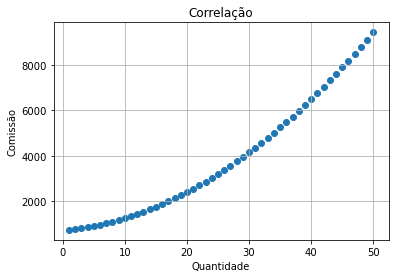

In [13]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

Verificando se os dados tem uma distribuição normal para fazer a primeira tentativa de Regressão Linear.

In [22]:
import scipy.stats as stats

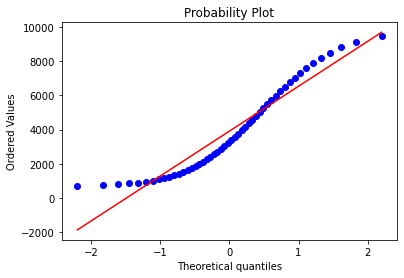

In [23]:
stats.probplot(vendas['comissao'], dist='norm', plot=plt)
plt.show()

Foi plotado um gráfico de probabilidade de dados de amostra comparando com uma distribuição normal. É possível observar que os dados não se comportam de forma normal. Mas mesmo assim vamos fazer o teste de hipóteses. 

In [26]:
estatistica, p = stats.shapiro(vendas.comissao)
print(p)

0.0012719858204945922


H0: p >= 0,05 : Distribuição Normal\
Ha: p < 0.05 : Distribuição é diferente da normal
\
\
Como valor p é menor que 0.05, portanto podemos afirmar que a distribuição não é normal. Ainda que já passamos por 2 validações para verificar se podemos fazer uma regressão linear, vamos ver se as duas variáveis possuem correlação.

In [27]:
coef, p = stats.pearsonr(vendas.quantidade, vendas.comissao)
print('Coeficiente de correlação:', coef)
print('Valor p:', p)

Coeficiente de correlação: 0.9771727342426183
Valor p: 5.979169551432808e-34


H0: p>= 0.05 : Não há correlação\
Ha: p < 0,05: Há correlação\
\
A partir desses dados podemos verificar que as variáveis possuem uma forte correlação. Porém, quando se junta à outras análises de gráfico e de distribuição normal, podemos afirmar que apesar da correlação, os dados não podem ser explicados por uma regressão linear.

## Regressão Linear

In [28]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [32]:
regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()

In [33]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           5.98e-34
Time:                        21:47:46   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

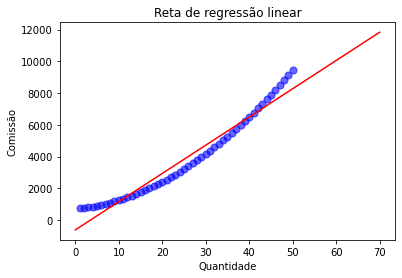

In [36]:
plt.scatter(y=vendas.comissao, x=vendas.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0,70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão linear')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.show()

Analisando o gráfico onde a reta de regressão linear é vermelho e os dados em azul, podemos perceber que a distância dos pontos com relação à reta é pequena e que por isso que o R2 pode ter dado alto. Porém percebe-se que:
- A reta corta o eixo x em -626 e eu não posso ter valores de comissão negativos;
- Os valores podem até ser explicados no intervalo entre 10 e 50 aproxidamente, porém ao passar desses valores a tendencia dos dados é se distanciar da reta. 


Portanto, quando for prever valores futuros, por exemplo, comissão para quantidade acima de 70, o modelo irá prever valores bem distantes do real pois a tendencia dos dados está com um comportamento diferente.\
\
A partir desse exemplo, podemos entender a importância de entender mais os dados antes de aplicar qualquer modelo estatístico.

## Regressão Polinomial - grau 2

y = b0 + b1.x + b2.x^2

In [38]:
regressao2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao,2))

In [39]:
#Valores previstos
y2 = regressao2(vendas.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [40]:
#coeficientes da equação (b2, b1 e b0)
regressao2.coef

array([  3.,  25., 700.])

In [41]:
print('Equação: Comissão = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2'.format(regressao2.coef[2], regressao2.coef[1], regressao2.coef[0]))

Equação: Comissão = 700.0 + 25.0*quantidade + 3.0*quantidade^2


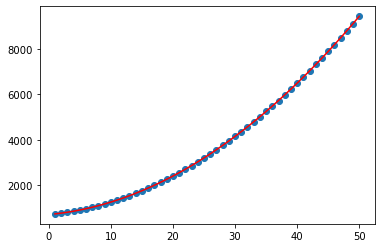

In [43]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y2,'r')
plt.show()

Aplicando a regressão polinomial de 2 grau podemos ver que o modelo ajustou bem aos dados. 

### Avaliação do modelo de regressão polinomial

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mean_absolute_error(vendas.comissao, y2)

2.2600943339057266e-12

In [46]:
mean_squared_error(vendas.comissao, y2)

6.89299944198095e-24

Os erros obtidos não são significativos, assim podemos validar o modelo de regressão polinomial para os dados obtidos.

Utilizando outra forma de obter um modelo de regressão, com a biblioteca de Sklearn. Ambos levam ao mesmo resultado, são somente formas diferentes.

## Regressão Polinomial utilizando Sklearn

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
# Pré Processamento - 2 graus
pre_process = PolynomialFeatures(degree=2)

In [15]:
x = vendas[['quantidade']] #-> serie
y = vendas.comissao

In [18]:
x_poly = pre_process.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.76

### Criando o modelo

In [19]:
regressao3 = LinearRegression()

In [20]:
regressao3.fit(x_poly, y)

LinearRegression()

In [21]:
y_predict = regressao3.predict(x_poly)

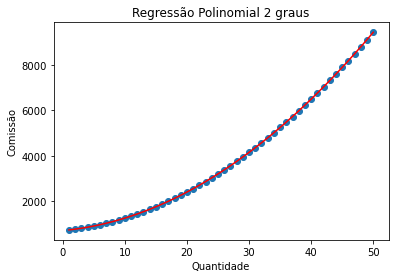

In [25]:
plt.scatter(x, y)
plt.plot(x, y_predict, c='red')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.title('Regressão Polinomial 2 graus')
plt.show()

In [26]:
regressao3.coef_

array([ 0., 25.,  3.])

In [27]:
regressao3.intercept_

700.0000000000045

In [29]:
print('Equação: Comissão = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2'.format(regressao3.intercept_, regressao3.coef_[1], regressao3.coef_[2]))

Equação: Comissão = 700.0 + 25.0*quantidade + 3.0*quantidade^2


### Avaliação do modelo

In [33]:
mean_absolute_error(y,y_predict)

1.6143530956469475e-12

In [34]:
mean_squared_error(y, y_predict)

3.628737949693563e-24

Os erros obtidos foram insignificantes, portanto, o modelo de regressão polinomial de segundo grau se ajustou bem aos dados.